In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('telco_churn.csv')

# Reading Data File

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Checking Data Size

In [4]:
data.shape

(7043, 21)

# Checking Variable Types

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Converting 'Text' data into 'Numerical'

### Remarks which variables are actually numeric but in data it was inserted as object/text data.

In [7]:
data["TotalCharges"]=pd.to_numeric(data['TotalCharges'],errors ='coerce') #Why errors='coerce' is important? Your code crashes when it finds " ". 
#It convert bad values as Bad values → NaN

# Checking Number of Missing Values

In [8]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
data['TotalCharges']=data['TotalCharges'].fillna(0)

In [10]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Calculating Churn Rate

### 4.1 Overall Churn Rate

#### Formula: Churn Rate = No. of Yes*100/(No. of Yes+ No. of 'No')

In [11]:
# First we have to count the total number of "Yes" and find the proportion.To do this we use 'value_counts()' function.
data['Churn'].value_counts()


Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [12]:
Churn_rate = data['Churn'].value_counts(normalize = True)['Yes']*100
print("Overall Churn Rate: ",Churn_rate)

Overall Churn Rate:  26.536987079369588


### Comment:
##### Overall Churn rate is 26.54%, indicating a significant customer retention issue.

### 4.2 Average Monthly Revenue

In [13]:
average_revenue = data['MonthlyCharges'].mean()
print('Monthly Average Revenue: ', average_revenue)

Monthly Average Revenue:  64.76169246059918


### 4.3 Revenue Lost Due to Churn

In [14]:
revenue_lost = data[data['Churn']=='Yes']['MonthlyCharges'].sum()

In [15]:
print('Revenue Lost Due to Churn: ', revenue_lost)

Revenue Lost Due to Churn:  139130.85


### Comment:
##### Churned customers are account for a monthly revenue loss of $1,39,130.85

### 4.4 Average Tenure(Loyalty Indicator)

In [16]:
average_tenure = data['tenure'].mean()
print('Average tenure of the customer: ', average_tenure)

Average tenure of the customer:  32.37114865824223


In [17]:
average_tenure_by_groub = data.groupby('Churn')['tenure'].mean()
print('Average Tenure by Group: ',average_tenure_by_groub)

Average Tenure by Group:  Churn
No     37.569965
Yes    17.979133
Name: tenure, dtype: float64


# Segment Analysis(Where Business Value Comes)

### 5.1 Churn Rate by Contract type

In [18]:
churn_by_contract = data.groupby('Contract')['Churn'].value_counts(normalize = True).unstack()*100
print(churn_by_contract)

Churn                  No        Yes
Contract                            
Month-to-month  57.290323  42.709677
One year        88.730482  11.269518
Two year        97.168142   2.831858


##### Comment: Month-to-month customers churn significantly more than long-term contracts.

### 5.2 Churn Rate by Internet Service

In [19]:
churn_rate_by_internet = data.groupby('InternetService')['Churn'].value_counts(normalize = True).unstack()*100
print('Churn rate by Internet Service: \n',churn_rate_by_internet)

Churn rate by Internet Service: 
 Churn                   No        Yes
InternetService                      
DSL              81.040892  18.959108
Fiber optic      58.107235  41.892765
No               92.595020   7.404980


##### Comment: The customer churn with Fiber Optic Internet service is significantly more than 'No' internet service.

### 5.3 Churn Rate by Payment Method

In [20]:
churn_rate_by_payment = data.groupby('PaymentMethod')['Churn'].value_counts(normalize = True).unstack()*100
print('Churn Rate by Payment Method: \n',churn_rate_by_payment)

Churn Rate by Payment Method: 
 Churn                             No        Yes
PaymentMethod                                  
Bank transfer (automatic)  83.290155  16.709845
Credit card (automatic)    84.756899  15.243101
Electronic check           54.714588  45.285412
Mailed check               80.893300  19.106700


##### Comment: Significantly more Customer Chrun for the Electronic Check Payment Method. 

### 5.4 Churn Rate by Senior Citizen

In [21]:
churn_rate_by_sinor = data.groupby('SeniorCitizen')['Churn'].value_counts(normalize = True).unstack()*100
print("Churn rate by Senior Citizen: \n",churn_rate_by_sinor)

Churn rate by Senior Citizen: 
 Churn                 No        Yes
SeniorCitizen                      
0              76.393832  23.606168
1              58.318739  41.681261


##### Comment: Customer churn for senior citizen significantly more than non-senior citizen.

# Tenure Based KPI Analysis ( Very Important for Business)

#### First we need to create groups based on the tenure(duration) of the customers before churn. To do this we must create
#### a new column for the tenure group so that the column holds 0-1 year, 1-2 year, 2-3 year, 3-4year, 4-5year and 5+ years. 

In [22]:
data['tenure_group'] = pd.cut(data['tenure'],bins = [0,12,24,48,60,100], labels = ['0-1 year','1-2 year','2-4 year','4-5 year', '5+ years'])


### Churn by Tenure Group

In [24]:
churn_tenure_group = data.groupby('tenure_group')['Churn'].value_counts(normalize = True).unstack()*100
print('Churn by Tenure Group:\n',churn_tenure_group)

Churn by Tenure Group:
 Churn                No        Yes
tenure_group                      
0-1 year      52.321839  47.678161
1-2 year      71.289062  28.710938
2-4 year      79.611041  20.388959
4-5 year      85.576923  14.423077
5+ years      93.390192   6.609808


C:\Users\proka\AppData\Local\Temp\ipykernel_15660\216026665.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_tenure_group = data.groupby('tenure_group')['Churn'].value_counts(normalize = True).unstack()*100


##### Comment: Customers within the first years shows most churn cases -> Onboarding is Critical

# KPI Visualization

### Churn by Contract

<Axes: xlabel='Contract'>

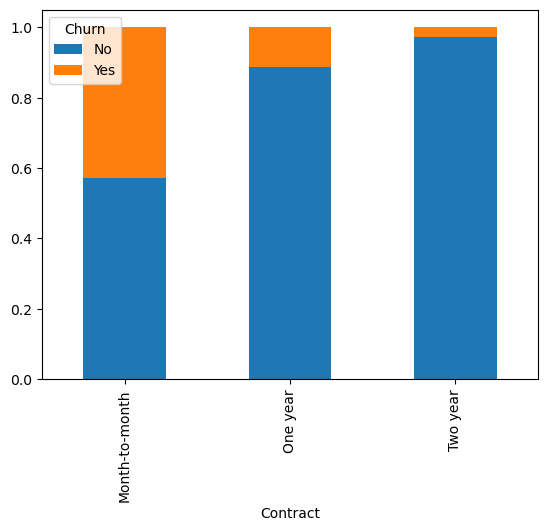

In [28]:
data.groupby('Contract')['Churn'].value_counts(normalize = True).unstack().plot(kind = 'bar',stacked = True)

### Churn by Payment Method

<Axes: xlabel='PaymentMethod'>

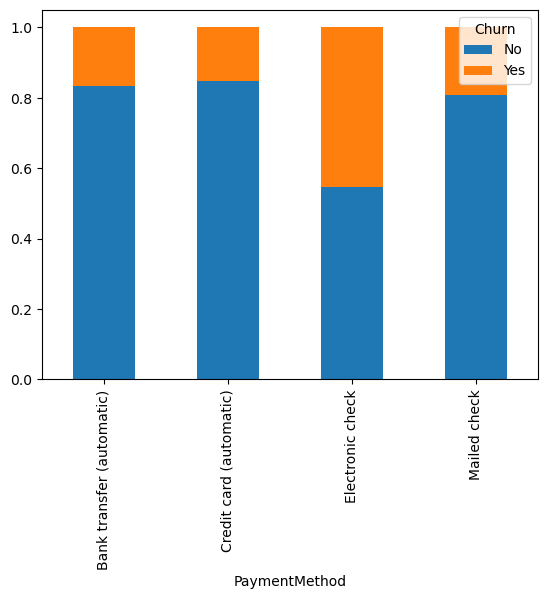

In [45]:
data.groupby('PaymentMethod')['Churn'].value_counts(normalize = True).unstack().plot(kind = 'bar',stacked =True)

### Churn by Charges

In [49]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Distribution of Monthly Charges')

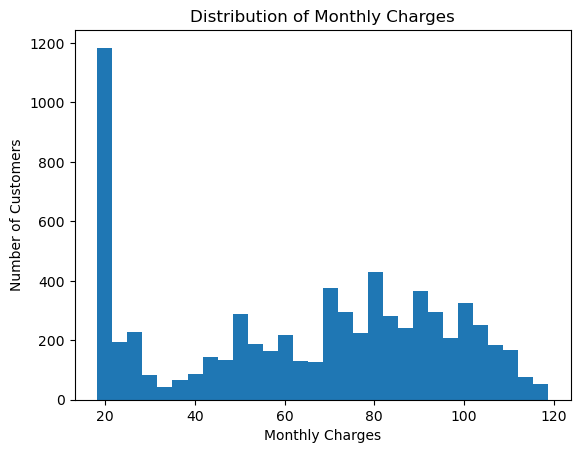

In [51]:
plt.hist(data['MonthlyCharges'], bins = 30)
plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.title('Distribution of Monthly Charges')

### Churns by Monthly Charges

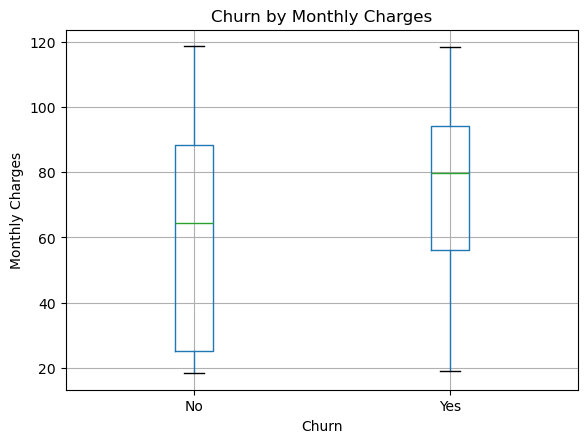

In [55]:
data.boxplot(column = 'MonthlyCharges', by = 'Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.title('Churn by Monthly Charges')
plt.suptitle('')
plt.show()

### Churn by Tenure Group

C:\Users\proka\AppData\Local\Temp\ipykernel_15660\1793280906.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('tenure_group')['Churn'].value_counts(normalize = True).unstack().plot(kind = 'bar', stacked = True)


<Axes: xlabel='tenure_group'>

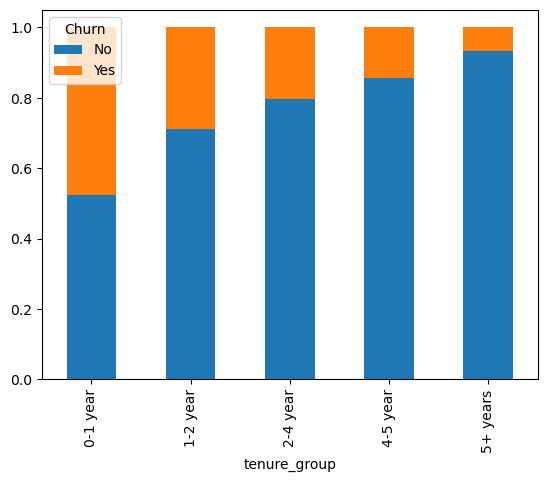

In [56]:
data.groupby('tenure_group')['Churn'].value_counts(normalize = True).unstack().plot(kind = 'bar', stacked = True)